In [8]:
# import libraries
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import backend as K
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# batch, classes, epochs
batch_size = 128
num_classes = 10
epochs = 25

In [10]:
# Splitting the data between train and test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input_shape = (x_train.shape[1:] + (1,)) # (28, 28, 1)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


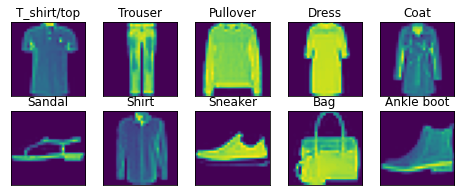

In [11]:
# plotting some random 10 images

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [12]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
# Printing sample data
print(y_train[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [15]:
# summary of the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)       

In [16]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255


In [17]:
history = model.fit(np.expand_dims(x_train, -1), y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3,
              shuffle=True)

Epoch 1/25
329/329 [==============================] - 162s 493ms/step - loss: 0.6676 - accuracy: 0.7697 - val_loss: 1.4349 - val_accuracy: 0.5177
Epoch 2/25
329/329 [==============================] - 161s 491ms/step - loss: 0.4271 - accuracy: 0.8452 - val_loss: 0.4143 - val_accuracy: 0.8526
Epoch 3/25
329/329 [==============================] - 162s 493ms/step - loss: 0.3672 - accuracy: 0.8684 - val_loss: 0.4326 - val_accuracy: 0.8296
Epoch 4/25
329/329 [==============================] - 162s 492ms/step - loss: 0.3350 - accuracy: 0.8775 - val_loss: 0.3315 - val_accuracy: 0.8753
Epoch 5/25
329/329 [==============================] - 162s 493ms/step - loss: 0.3081 - accuracy: 0.8890 - val_loss: 0.3144 - val_accuracy: 0.8819
Epoch 6/25
329/329 [==============================] - 162s 493ms/step - loss: 0.2889 - accuracy: 0.8955 - val_loss: 0.2798 - val_accuracy: 0.8932
Epoch 7/25
329/329 [==============================] - 162s 493ms/step - loss: 0.2741 - accuracy: 0.8993 - val_loss: 0.2985 -

Result: The training accuracy is increasing because of BN but the difference between train accuracy and validation accuracy is low.

313/313 [==============================] - 9s 30ms/step - loss: 0.2709 - accuracy: 0.9047
Test Accuracy : 0.905


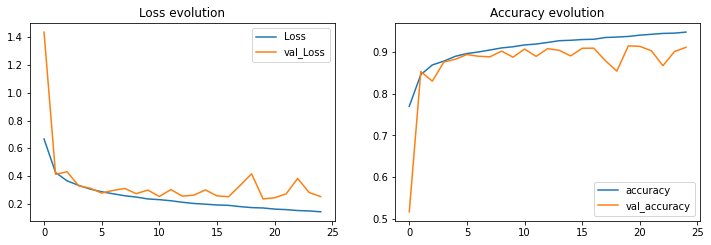

In [18]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

evaluation = model.evaluate(np.expand_dims(x_test, -1), y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]
predicted_classes = model.predict_classes(np.expand_dims(x_test, -1))

print(classification_report(y_test, predicted_classes, target_names = target_names))